In [1]:
import numpy as np
import pandas as pd
import plotly.offline as pyo
import plotly.graph_objs as go


In [8]:
df = pd.read_csv("sodexo-spending.csv", sep=";", parse_dates=['Timestamp'])

In [9]:
df.head()

,Timestamp,Card type,Transaction ID,Transaction Details,Credit INR,Debit INR,Previous Balance INR,New Balance INR
0,2019-06-27 14:20:00,Meal card,115713806530,SODEXO FOOD SOLUTIONS (I) PVT LTD,0.0,65.0,1591.0,1526.0
1,2019-06-27 11:43:57,Meal card,115715777246,SODEXO FOOD SOLUTIONS (I) PVT LTD,0.0,38.0,1629.0,1591.0
2,2019-06-27 09:37:52,Meal card,115710769258,SODEXO FOOD SOLUTIONS (I) PVT LTD,0.0,20.0,1649.0,1629.0
3,2019-06-27 09:29:12,Meal card,115713769003,SODEXO FOOD SOLUTIONS (I) PVT LTD,0.0,25.0,1674.0,1649.0
4,2019-06-26 16:40:40,Meal card,115710666673,SODEXO FOOD SOLUTIONS (I) PVT LTD,0.0,20.0,1694.0,1674.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 8 columns):
Timestamp               494 non-null datetime64[ns]
Card type               494 non-null object
Transaction ID          494 non-null int64
Transaction Details     494 non-null object
Credit INR              494 non-null float64
Debit INR               494 non-null float64
Previous Balance INR    494 non-null float64
New Balance INR         494 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 31.0+ KB


In [11]:
df.dtypes

Timestamp               datetime64[ns]
Card type                       object
Transaction ID                   int64
Transaction Details             object
Credit INR                     float64
Debit INR                      float64
Previous Balance INR           float64
New Balance INR                float64
dtype: object

In [12]:
df['Timestamp'].head()

0   2019-06-27 14:20:00
1   2019-06-27 11:43:57
2   2019-06-27 09:37:52
3   2019-06-27 09:29:12
4   2019-06-26 16:40:40
Name: Timestamp, dtype: datetime64[ns]

In [14]:
df.sort_values(by=['Timestamp'], inplace=True, ascending=False)

In [15]:
df.head()

,Timestamp,Card type,Transaction ID,Transaction Details,Credit INR,Debit INR,Previous Balance INR,New Balance INR
367,2020-12-03 13:10:36,Meal card,147329056422,SODEXO FOOD SOLUTIONS (I) PVT LTD,0.0,65.0,2084.0,2019.0
368,2020-12-03 10:08:57,Meal card,147325041014,SODEXO FOOD SOLUTIONS (I) PVT LTD,0.0,25.0,2109.0,2084.0
416,2020-12-02 16:44:33,Meal card,144303525066,SODEXO FOOD SOLUTIONS (I) PVT LTD,0.0,35.0,2296.0,2261.0
417,2020-12-02 13:08:53,Meal card,144369495657,SODEXO FOOD SOLUTIONS (I) PVT LTD,0.0,75.0,2371.0,2296.0
418,2020-12-02 10:08:20,Meal card,144413479394,SODEXO FOOD SOLUTIONS (I) PVT LTD,0.0,35.0,2406.0,2371.0


In [16]:
df.tail()

,Timestamp,Card type,Transaction ID,Transaction Details,Credit INR,Debit INR,Previous Balance INR,New Balance INR
282,2019-01-08 11:17:06,Meal card,1176981849883,SODEXO FOOD SOLUTIONS (I) PVT LTD,0.0,38.0,1158.0,1120.0
361,2019-01-07 15:35:57,Meal card,1157121312866,SODEXO FOOD SOLUTIONS (I) PVT LTD,0.0,10.0,1412.0,1402.0
362,2019-01-07 15:09:30,Meal card,1157851303674,SODEXO FOOD SOLUTIONS (I) PVT LTD,0.0,76.0,1488.0,1412.0
363,2019-01-07 11:11:23,Meal card,1157121272337,SODEXO FOOD SOLUTIONS (I) PVT LTD,0.0,10.0,1498.0,1488.0
364,2019-01-07 10:52:25,Meal card,1157151266192,SODEXO FOOD SOLUTIONS (I) PVT LTD,0.0,28.0,1526.0,1498.0


In [17]:
df.describe()

,Transaction ID,Credit INR,Debit INR,Previous Balance INR,New Balance INR
count,4.940000e+02,494.000000,494.000000,494.000000,494.000000
mean,5.220430e+11,40.617409,36.779352,2358.599190,2362.437247
std,5.426413e+11,281.942108,35.879417,900.041539,893.985531
min,1.157084e+11,0.000000,0.000000,0.000000,242.000000
25%,1.242075e+11,0.000000,20.000000,1674.500000,1678.000000
50%,1.407399e+11,0.000000,35.000000,2402.000000,2402.000000
75%,1.195401e+12,0.000000,40.000000,3004.500000,3004.500000
max,1.466991e+12,2000.000000,569.000000,4273.000000,4273.000000


In [20]:
import matplotlib
%matplotlib inline



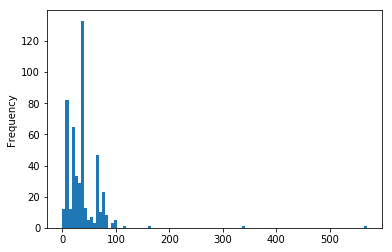

In [22]:
df['Debit INR'].plot(kind='hist',bins=100)


In [25]:
df['day_of_week'] = df['Timestamp'].dt.dayofweek

days = {0:'MONDAY',1:'TUESDAY',2:'WEDNESDAY',3:'THURSDAY',4:'FRIDAY',5:'SATURDAY',6:'SUNDAY'}

df['day_of_week'] = df['day_of_week'].apply(lambda x: days[x])



In [26]:
df.head()

,Timestamp,Card type,Transaction ID,Transaction Details,Credit INR,Debit INR,Previous Balance INR,New Balance INR,day_of_week
367,2020-12-03 13:10:36,Meal card,147329056422,SODEXO FOOD SOLUTIONS (I) PVT LTD,0.0,65.0,2084.0,2019.0,THURSDAY
368,2020-12-03 10:08:57,Meal card,147325041014,SODEXO FOOD SOLUTIONS (I) PVT LTD,0.0,25.0,2109.0,2084.0,THURSDAY
416,2020-12-02 16:44:33,Meal card,144303525066,SODEXO FOOD SOLUTIONS (I) PVT LTD,0.0,35.0,2296.0,2261.0,WEDNESDAY
417,2020-12-02 13:08:53,Meal card,144369495657,SODEXO FOOD SOLUTIONS (I) PVT LTD,0.0,75.0,2371.0,2296.0,WEDNESDAY
418,2020-12-02 10:08:20,Meal card,144413479394,SODEXO FOOD SOLUTIONS (I) PVT LTD,0.0,35.0,2406.0,2371.0,WEDNESDAY


In [59]:
#f[df['day_of_week']=='THURSDAY'].sum()
df[df['day_of_week']=='THURSDAY']['Debit INR'].sum()

3480.0

In [64]:
df['day_of_week'].unique()

array(['THURSDAY', 'WEDNESDAY', 'TUESDAY', 'MONDAY', 'FRIDAY', 'SATURDAY',
       'SUNDAY'], dtype=object)

In [65]:
mydata = []

xdata = ['MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY', 'SUNDAY'] #df['day_of_week'].unique()
ydata = []

for day in ['MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY', 'SUNDAY']:
    ydata.append(df[df['day_of_week']==day]['Debit INR'].sum())

trace = go.Bar(x=xdata, 
               y=ydata
              )

mydata.append(trace)

mylayout = go.Layout(title="Sodexo Spending by Weekdays")

myfig = go.Figure(data=mydata, layout=mylayout)


In [66]:
pyo.plot(myfig,filename='Sodexo-Spend-By-Days.html')

'Sodexo-Spend-By-Days.html'

In [67]:
# Total spendings yet
df['Debit INR'].sum()

18169.0

In [68]:
df["Debit INR"].describe()

count    494.000000
mean      36.779352
std       35.879417
min        0.000000
25%       20.000000
50%       35.000000
75%       40.000000
max      569.000000
Name: Debit INR, dtype: float64

In [69]:
#Highest transaction
df[df['Debit INR']>=500]

,Timestamp,Card type,Transaction ID,Transaction Details,Credit INR,Debit INR,Previous Balance INR,New Balance INR,day_of_week
493,2020-01-01 15:39:48,Meal card,140328086946,DOMINO'S PIZZA,0.0,569.0,1934.0,1365.0,WEDNESDAY


In [70]:
# Top 10 Transactions
df.nlargest(10, 'Debit INR')

,Timestamp,Card type,Transaction ID,Transaction Details,Credit INR,Debit INR,Previous Balance INR,New Balance INR,day_of_week
493,2020-01-01 15:39:48,Meal card,140328086946,DOMINO'S PIZZA,0.0,569.0,1934.0,1365.0,WEDNESDAY
65,2019-02-12 20:29:37,Meal card,137718970850,PATEL R MART,0.0,340.0,2435.0,2095.0,TUESDAY
19,2019-12-24 17:06:10,Meal card,139776620419,SODEXO FOOD SOLUTIONS (I) PVT LTD,0.0,160.0,2273.0,2113.0,TUESDAY
210,2019-09-23 14:17:12,Meal card,121472969014,SODEXO FOOD SOLUTIONS (I) PVT LTD,0.0,116.0,3028.0,2912.0,MONDAY
409,2020-02-17 13:06:29,Meal card,1446581029357,SODEXO FOOD SOLUTIONS (I) PVT LTD,0.0,102.0,1908.0,1806.0,MONDAY
412,2020-02-14 12:54:58,Meal card,144658781853,SODEXO FOOD SOLUTIONS (I) PVT LTD,0.0,102.0,2115.0,2013.0,FRIDAY
370,2020-11-03 12:55:31,Meal card,1464232188377,SODEXO FOOD SOLUTIONS (I) PVT LTD,0.0,98.0,2242.0,2144.0,TUESDAY
379,2020-04-03 13:01:56,Meal card,1464031123120,SODEXO FOOD SOLUTIONS (I) PVT LTD,0.0,98.0,603.0,505.0,FRIDAY
365,2020-03-13 12:44:41,Meal card,147324196702,SODEXO FOOD SOLUTIONS (I) PVT LTD,0.0,98.0,1994.0,1896.0,FRIDAY
472,2020-10-01 12:58:46,Meal card,141032258281,SODEXO FOOD SOLUTIONS (I) PVT LTD,0.0,94.0,2580.0,2486.0,THURSDAY


In [71]:
# Calendar Heatmap